# Mutual information (MI): basic demo

This example illustrates how mutual information workd.

We consider 3 features x_1, x_2, x_3 distributed uniformly over (0, 1), the target depends on them as follows:

y = x_1 + sin(6 * pi * x_2) + 0 * x_3, that is the third features is completely irrelevant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0 * X[:, 2]

Here, we plot the surface y generated by the x_1 and x_2 features. Note that here x_3 has been removed as it is not relevant. Also, for ease of viewing, noise is not considered for this surface plot.

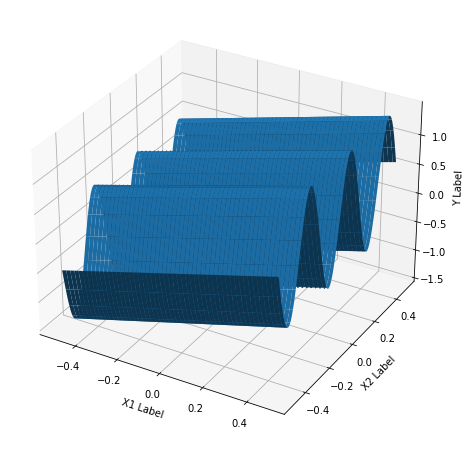

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

def fun(x1, x2):
    return x1 + np.sin(6 * np.pi * x2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
x1 = x2 = np.arange(-0.5, 0.5, 0.005)
X1, X2 = np.meshgrid(x1, x2)
ys = np.array(fun(np.ravel(X1), np.ravel(X2)))
Y = ys.reshape(X1.shape)

ax.plot_surface(X1, X2, Y)

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

plt.show()

The code below plots the dependency of y against individual x_i. Normalized values of the mutual information score are given for each variable. 

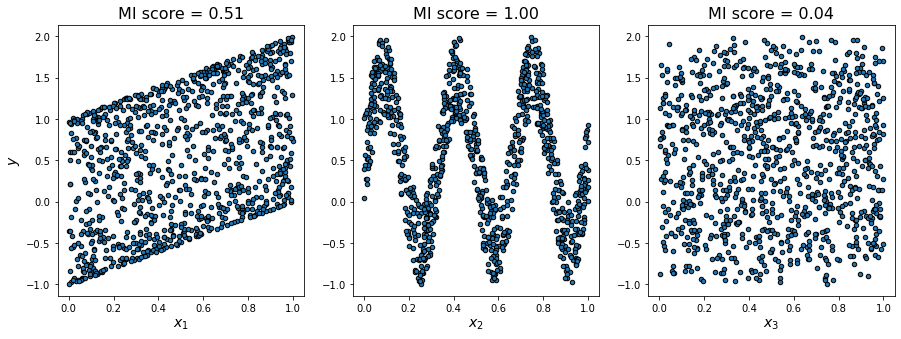

In [3]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("MI score = {:.2f}".format(mi[i]), fontsize=16)
plt.show()

Mutual information can capture any kind of dependency between variables and it rates x_2 as the most discriminative feature, which probably agrees better with our intuitive perception for this example. It also correctly marks x_3 as irrelevant.